In [1]:
import copy
import time 
import torch
import sys, os
import numpy as np
import numpy.linalg as LA
from os.path import abspath, join, dirname, expanduser

sys.path.append(join(os.getcwd(), ".."))

from utils import *
from visuals import *
from pde_solvers import *

from scipy.io import savemat
from datetime import datetime 

import matplotlib 
%matplotlib inline 

# avoid Type 3 fonts ===> http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import matplotlib.pyplot as plt 

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

OSError: [WinError 182] The operating system cannot run %1. Error loading "c:\Users\lekanmolu\.conda\envs\37\lib\site-packages\torch\lib\caffe2_detectron_ops.dll" or one of its dependencies.

In [9]:
data_dir = "/opt/SoRoPD.bak/"

_labelsize = 18
_fontdict = {'fontsize':34, 'fontweight':'bold'}

fname: 072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: True, cable: False
runtime: 661.5728 mins or  11.0262 hours.
controller: PD | Kp: 4.0 | Kd: 0.5 | tip_load: 10
savename: 072723_with_drag_4_pieces_tipload.10N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


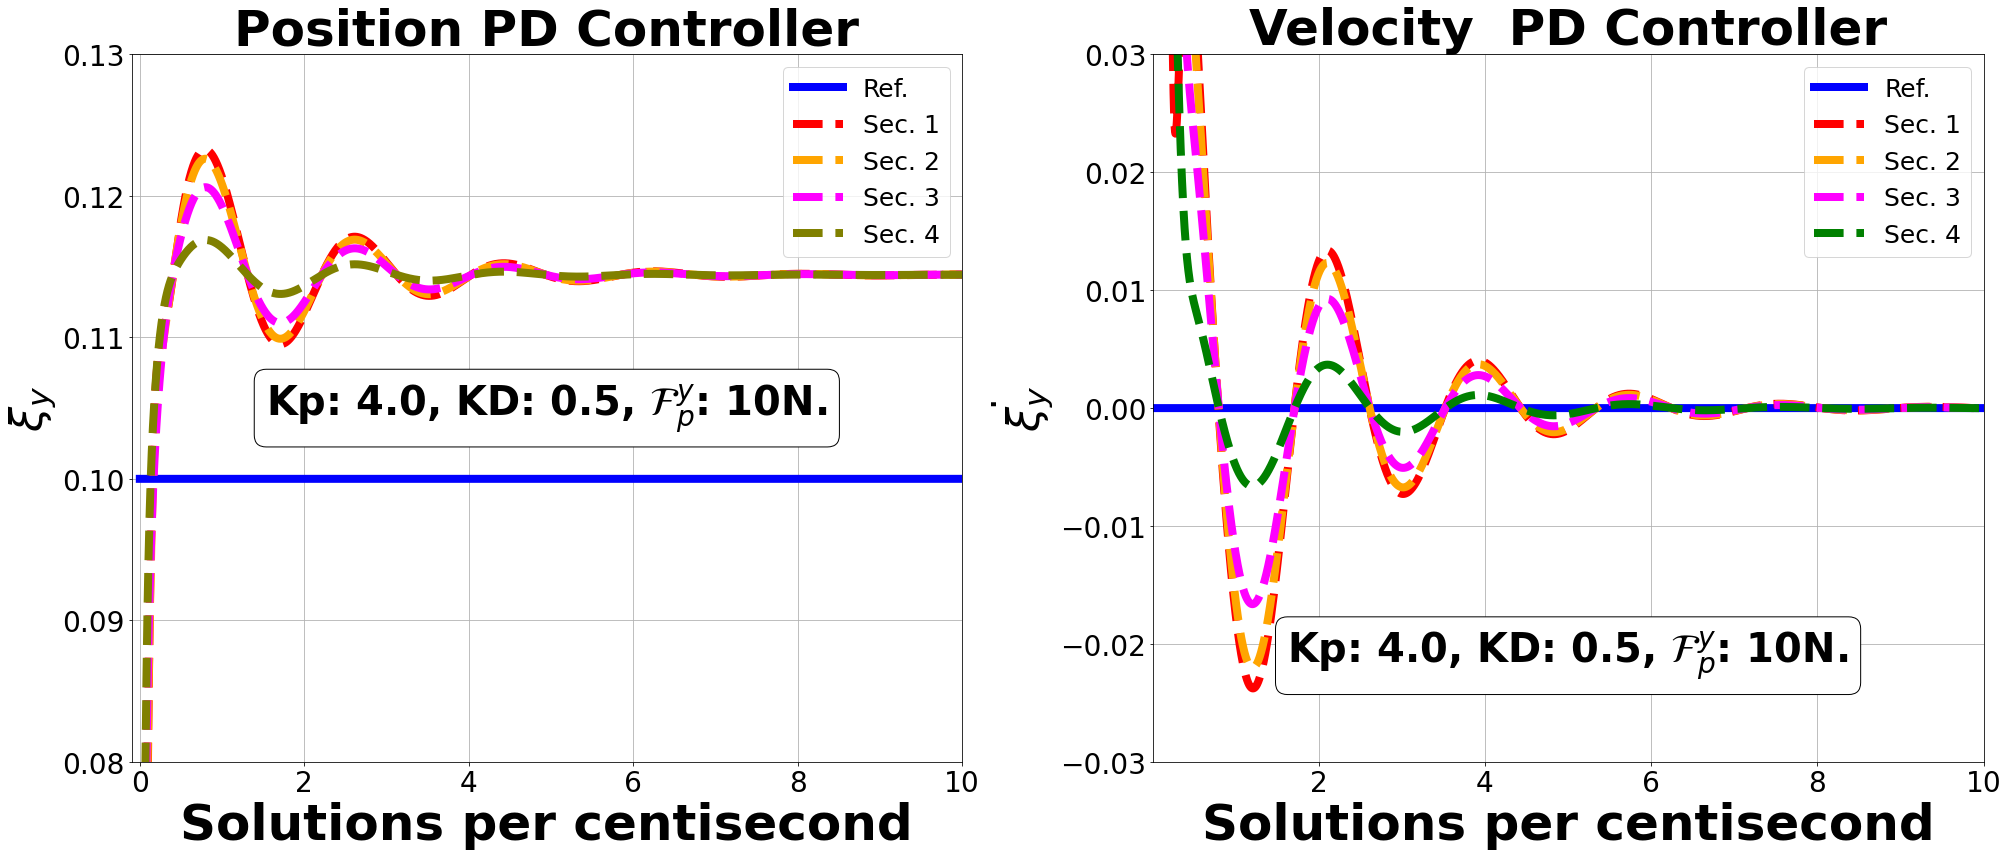

In [10]:
fname = "072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz"
bundle = load_file(fname, data_dir)

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)
plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'Position {bundle.controller} Controller', plot_type="pos",  lw=8, 
                ylabel=r'${{\xi_{y} }}$',  xlim=(-0.1, 10.000), ylim=[0.08, 0.13], plt_len=10000)
plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'Velocity  {bundle.controller} Controller', plot_type="vel", lw=8, \
                annotate=True, xy_pos=(5, -0.0210), ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.01, 10.00), \
                ylim=[-0.03, 0.03], plt_len=10000, save=True)
plt.show() 

In [21]:
bundle.qd 

array(0.3)

fname: 091423_17_02_46_cable_grav_5pcs_0.2N_PD_final.npz, strain_goal(q^d): 0.3
num_pieces: 5 num_sections: 41, drag: False, cable: True
runtime: 6456.6677 mins or  107.6111 hours.
controller: PD | Kp: 1.5 | Kd: 5.8 | tip_load: 0.2
savename: 091423_cable_grav_5pcs_0.2N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


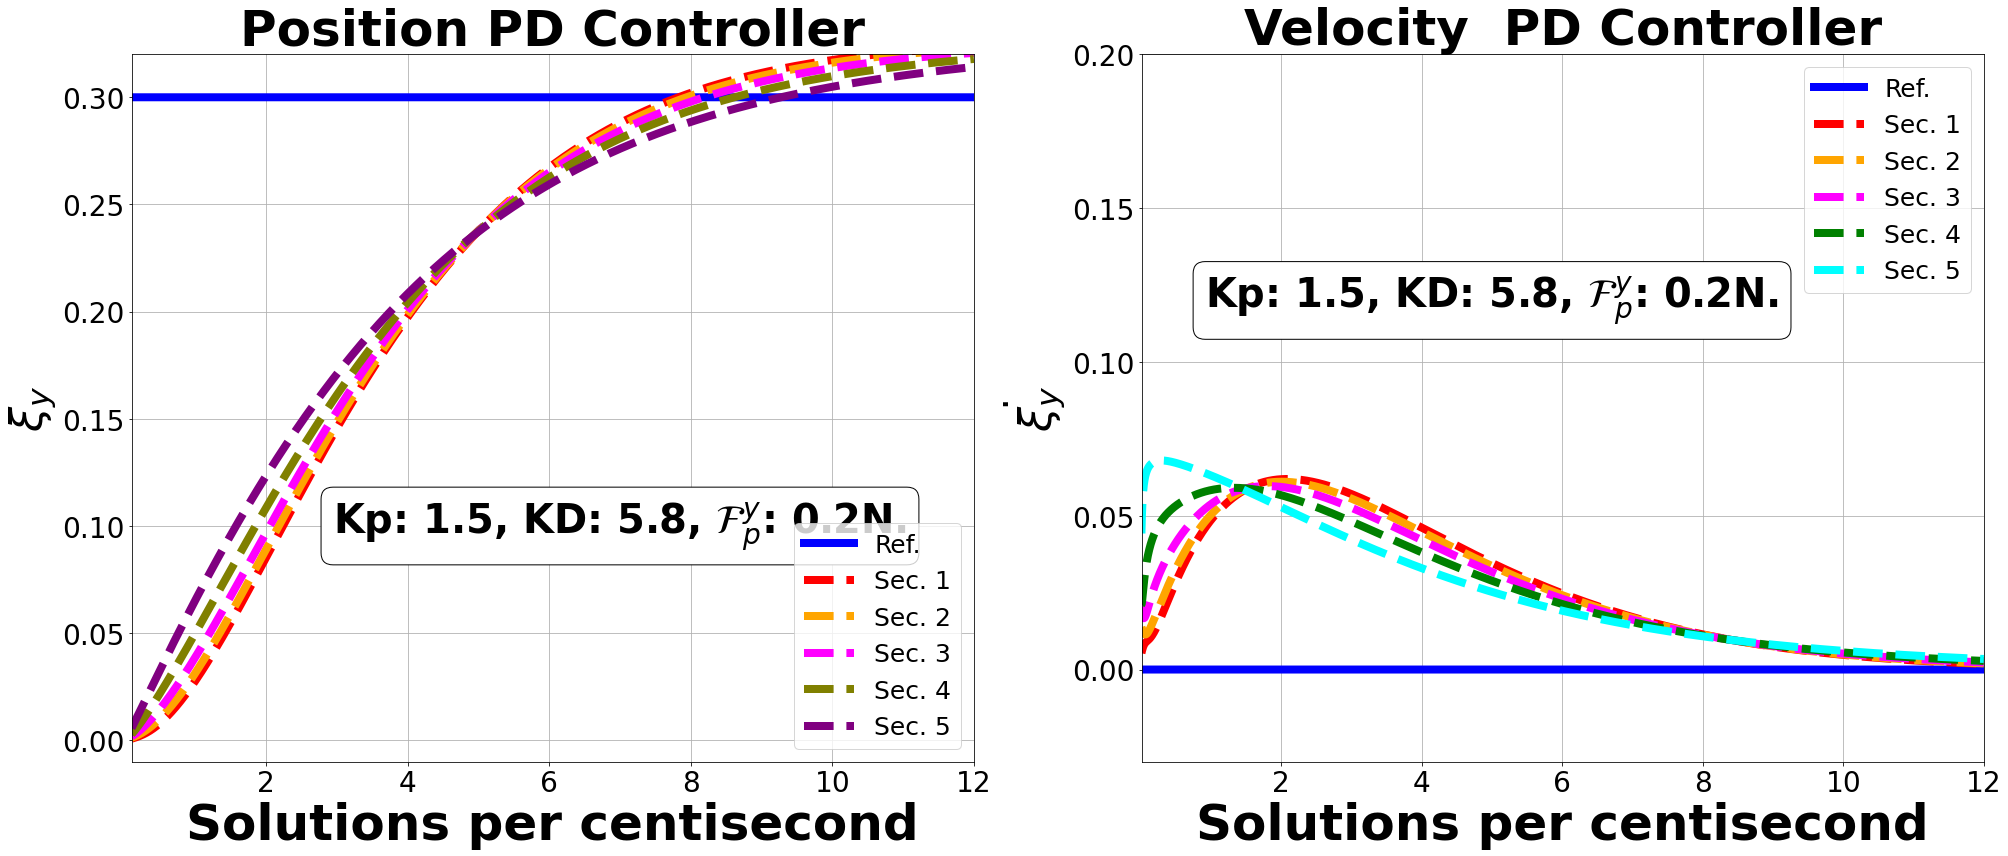

In [37]:
fname="091423_17_02_46_cable_grav_5pcs_0.2N_PD_final.npz"
bundle = load_file(fname, data_dir="/opt/SoRoPD")

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)
plot_axis_strains(ax1, bundle, bundle.qd.take(0), _labelsize, title=f'Position {bundle.controller} Controller', plot_type="pos",  lw=8, 
                ylabel=r'${{\xi_{y} }}$',  xlim=(0.1, 12), ylim=[-0.01, 0.32], plt_len=None, annotate=True, xy_pos=(7, 0.1))
plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'Velocity  {bundle.controller} Controller', plot_type="vel", lw=8, \
                annotate=True, xy_pos=(5, 0.12), ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.01, 12.00), \
                ylim=[-0.03, 0.2], plt_len=None, save=True)
plt.show() 

fname: 072423_05_46_53_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: False
runtime: 283.4795 mins or  4.7247 hours.
controller: PD | Kp: 2.5 | Kd: 0.35 | tip_load: 10
savename: PD_fixed_fluid_lower_kp


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


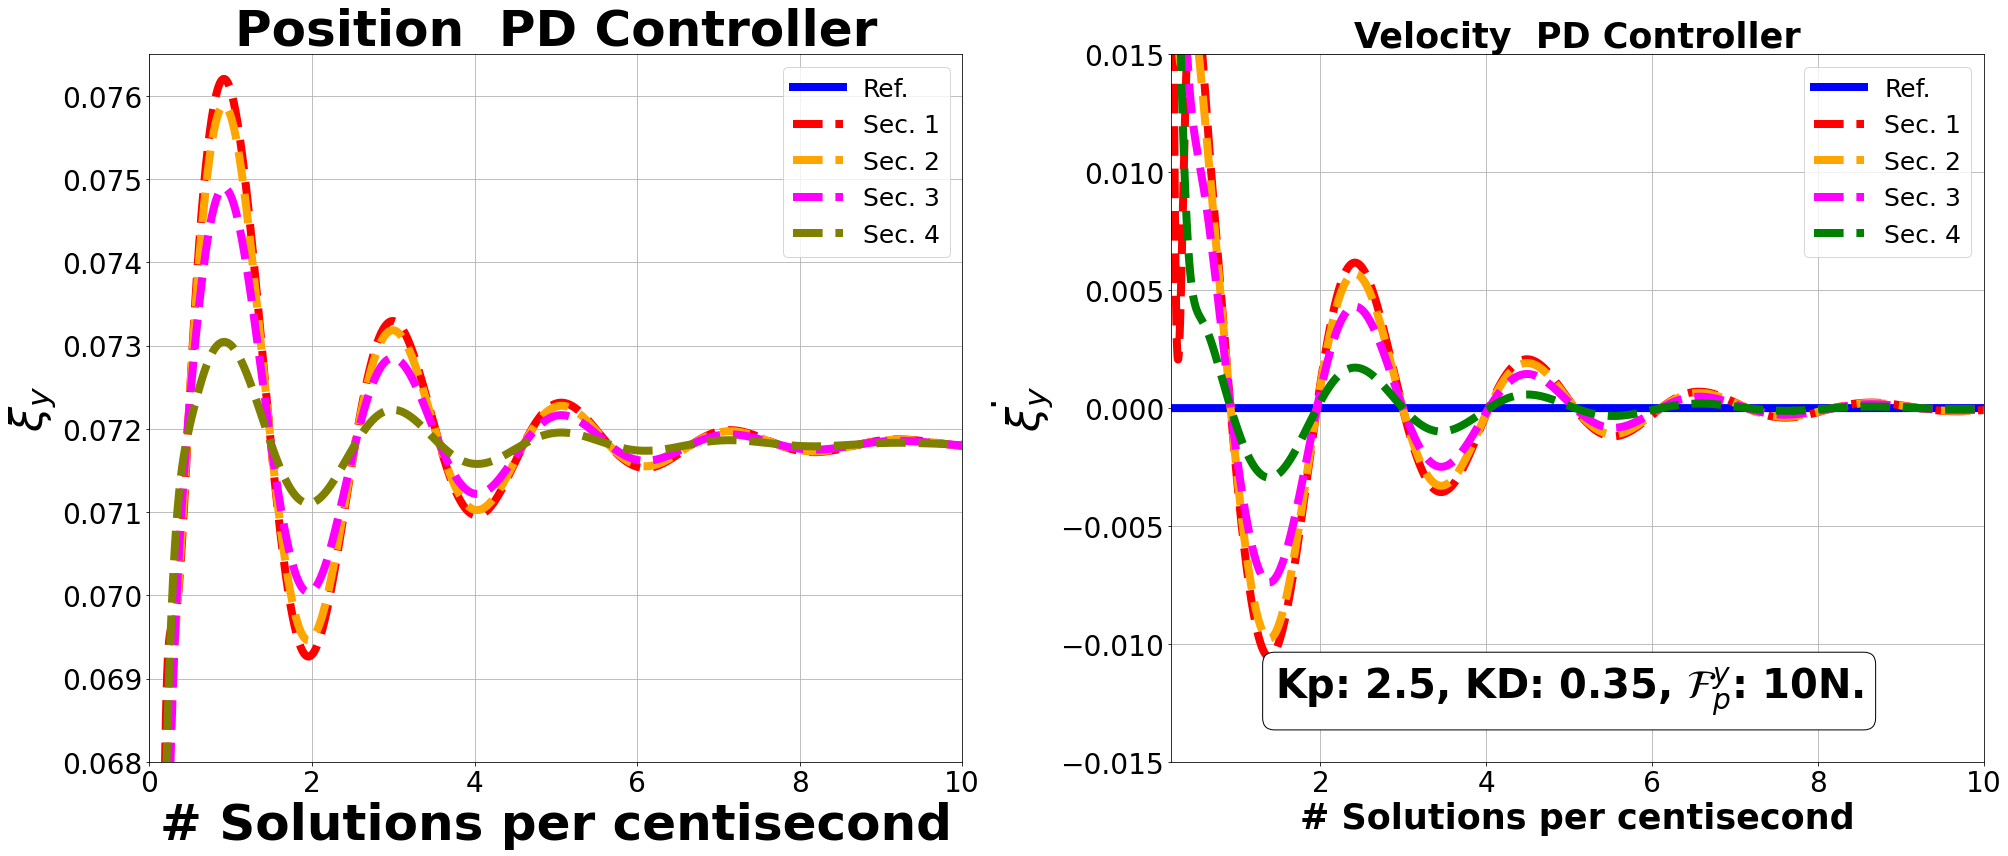

In [14]:
fname="072423_05_46_53_4_pieces_tipload.10N_PD_Control.npz"
bundle = load_file(fname, data_dir)

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)
plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'Position  {bundle.controller} Controller', plot_type="pos", 
                 lw=8, ylabel=r'${{\xi_{y} }}$',  xlim=(0.0, 10.000), ylim=[0.068, 0.0765], plt_len=10000, annotate=False)
plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'Velocity  {bundle.controller} Controller', plot_type="vel", annotate=True,
                 lw=8, ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.200, 10), ylim=[-0.015, 0.015], plt_len=10000, xy_pos=(5, -0.012),
                 save=True, savename=f"{bundle.controller}_fixed_fluid_lower_kp", _fontdict = {'fontsize':35, 'fontweight':'bold'})
plt.show() 

fname: 072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: False
runtime: 277.4110 mins or  4.6235 hours.
controller: PD | Kp: 3.5 | Kd: 0.34 | tip_load: 10
savename: fixed_fluid


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


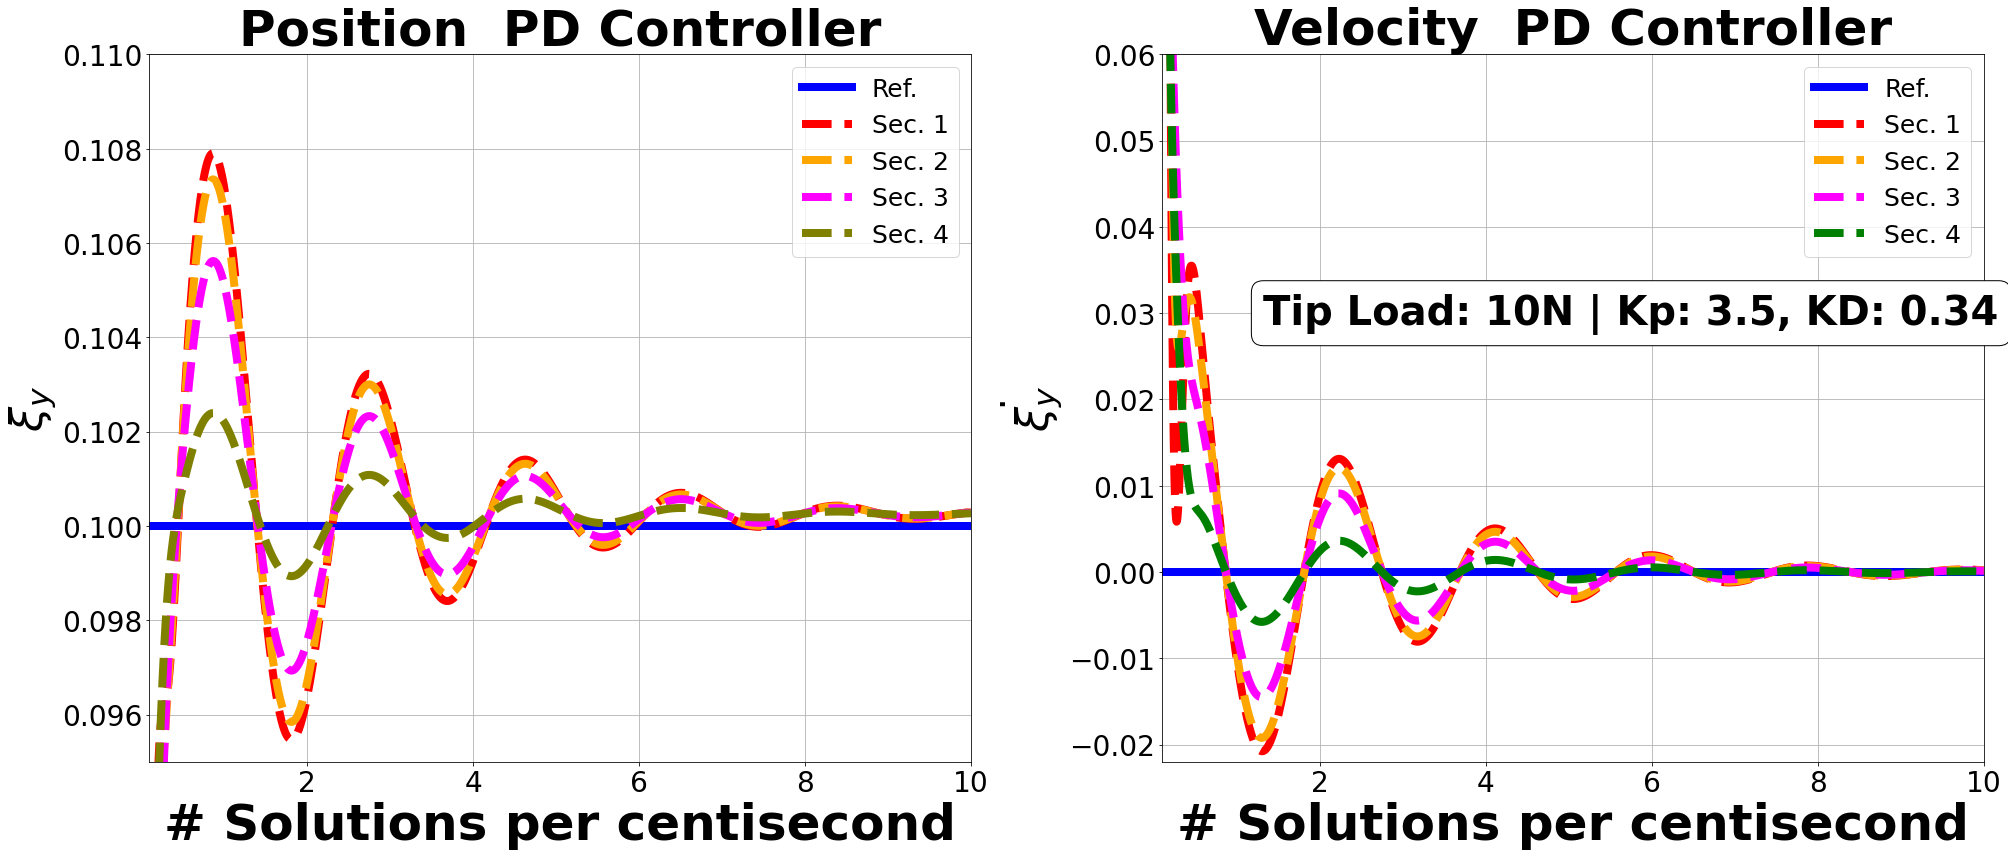

In [30]:
fname = "072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz"
bundle = load_file(fname, data_dir)

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)
plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'Position  {bundle.controller} Controller', plot_type="pos", 
                 lw=8, ylabel=r'${{\xi_{y} }}$',  xlim=(0.1, 10.000), ylim=[0.095, 0.11], plt_len=10000, annotate=False)
plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'Velocity  {bundle.controller} Controller', plot_type="vel", annotate=False,
                 lw=8, ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.100, 10), ylim=[-0.022, 0.06], plt_len=10000, 
                 save=True, savename="fixed_fluid")
gains = rf'Tip Load: {bundle.tip_load}N | Kp: {bundle.Kp}, KD: {bundle.Kd}'
ax2.annotate(gains, xy=(5.75, 0.03), xycoords="data", va="center", ha="center", fontsize=40, 
                fontweight='bold', bbox=dict(boxstyle="round", fc="w"))
plt.show() 


fname: 090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: 0, cable: 1
runtime: 3856.9614 mins or  64.2827 hours.
controller: PD | Kp: 50.0 | Kd: 5.42 | tip_load: 0.2
savename: 090623_with_cable_10_pieces_tipload.0.2N_PD


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


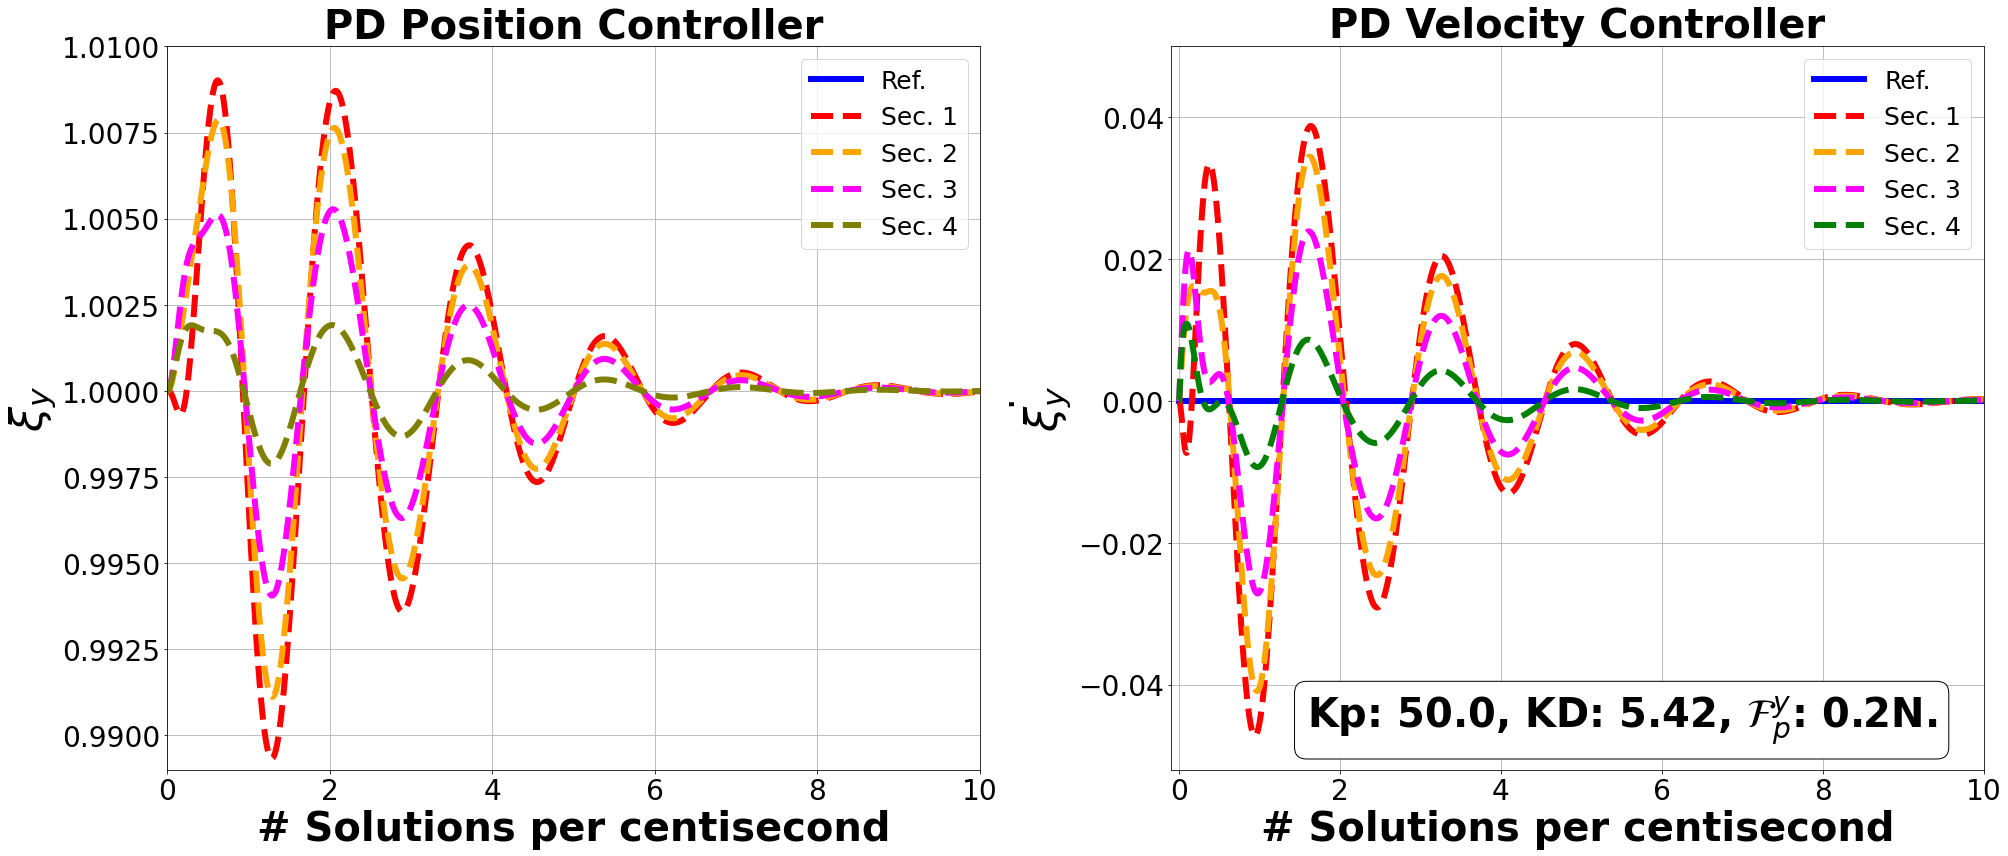

In [23]:
fname = "090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz"
bundle = load_file(fname, data_dir)

# calculate time from position:: 0.1 sin^{-1}(\xi_y)
t_pos = 0.1
qbatch, plt_idx = bundle.qbatch, 3

tspan = np.linspace(0, 10, 10000)
tref = tspan 
tref = tspan
tdref = tspan

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)

# # title is fpr varying control
plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'{bundle.controller} Position Controller', plot_type="pos", lw=6,
                 plt_idx=3, ylabel=r'${{\xi_{y} }}$', xlim=(0, 10.000), ylim=[0.989, 1.01], plt_len=int(1e4), annotate=False, 
                 _fontdict = {'fontsize':40, 'fontweight':'bold'})

plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", 
                annotate=True,  xy_pos=(5.5, -0.045), 
                plt_idx=3, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.100, 10.000), ylim=[-0.052, 0.05], lw=6, 
                 _fontdict = {'fontsize':40, 'fontweight':'bold'}, save=True)

plt.show() 

fname: 091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: 0, cable: 1
runtime: 3087.4334 mins or  51.4572 hours.
controller: PD | Kp: 1.5 | Kd: 5.8 | tip_load: 1.0
savename: PD_varying2_controlled


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


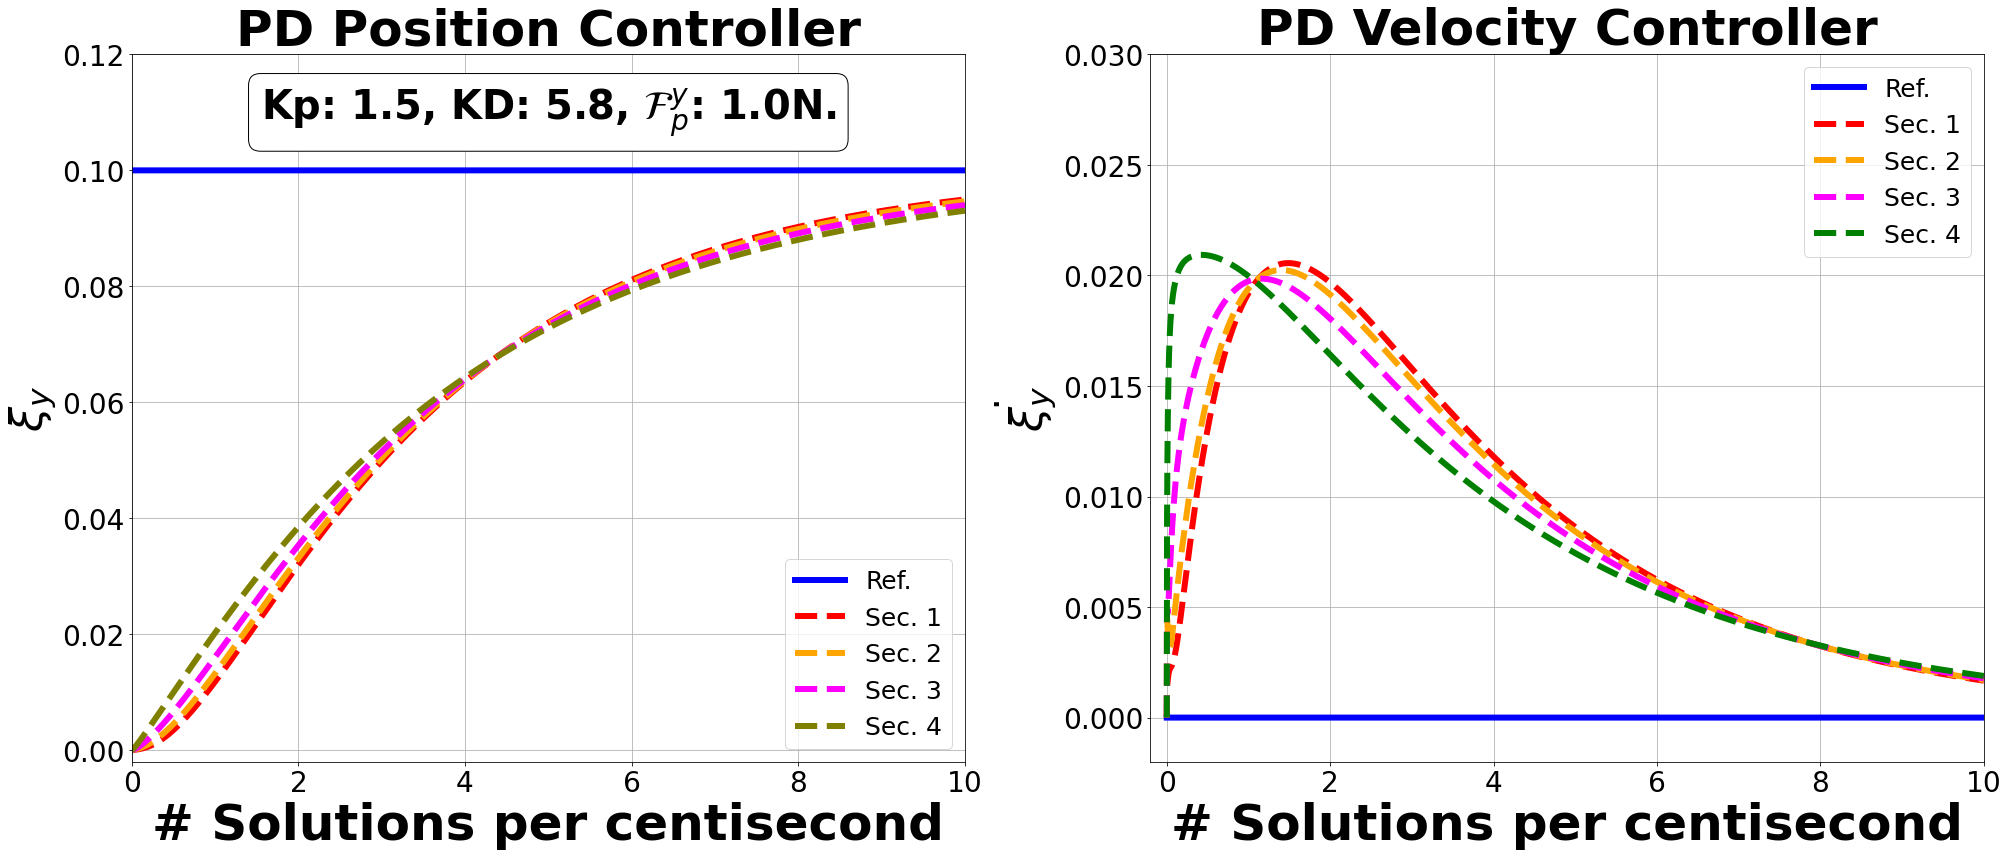

In [26]:
fname="091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz"
bundle = load_file(fname, data_dir)


# calculate time from position:: 0.1 sin^{-1}(\xi_y)
t_pos = 0.1
qbatch, plt_idx = bundle.qbatch, 5

fig_batch = plt.figure(figsize=(28,12)); ax1 = fig_batch.add_subplot(1, 2, 1);   ax2 = fig_batch.add_subplot(1, 2, 2)

plot_axis_strains(ax1, bundle, 0.1, _labelsize, title=f'{bundle.controller} Position Controller', plot_type="pos", lw=6,
                 plt_idx=plt_idx, ylabel=r'${{\xi_{y} }}$', xlim=(-0.002, 10), ylim=[-0.002, 0.12], annotate=True, xy_pos=(5, 0.11),
                  plt_len=len(qbatch),
                )

plot_axis_strains(ax2, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", 
                plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.200, 10), annotate=False,
                ylim=[-.002, 0.03], lw=6, xy_pos=(25, 0.023), save=True, savename="PD_varying2_controlled")

plt.show() 

### Plots for SoRoPD ICRA Paper 

In [3]:
def get_fig_ax():
    fig = plt.figure(figsize=(28,12)); 
    ax = fig.add_subplot(1, 1, 1)

    return ax 

data_dir = "/opt/SoRoPD.bak";  _labelsize=18  

def plot_axis_strains(ax, bundle, ref, _labelsize = 18, title=None, plot_type="pos",
                        ylabel=None, xlim=(-0.5, 10), ylim=[-0.02, 0.2], xy_pos=None,
                        _fontdict = {'fontsize':50, 'fontweight':'bold'}, \
                        plt_idx=4, lw=10, plt_len=None, save=False, annotate=True,  savename=None, \
                        save_dir = join(expanduser("~"), "Documents/Papers/Pubs23/SoRoBC/figures")):
   
    

    if strcmp(plot_type, "pos"):
        colors = iter(plt.cm.turbo_r(np.arange(0.15, bundle.pieces, bundle.pieces)))
        colors = iter(["red", "orange", "magenta", "olive", "purple", "pink", "green", "cyan", "black", "yellow"])
        # colors = iter(plt.cm.turbo_r(np.arange(0, bundle.pieces))) #*.25, bundle.pieces)))
    else:
        colors = iter(plt.cm.viridis_r(np.arange(0, bundle.pieces))) #*.25, bundle.pieces)))
        colors = iter(["red", "orange", "magenta",  "green", "cyan", "black", "yellow", "olive", "purple", "pink"])

    runtime, controller =  bundle.runtime, bundle.controller 
    qbatch = bundle.qbatch if strcmp(plot_type, "pos") else bundle.qdbatch
    if strcmp(controller, "backstep"):
        gains = rf'Kp: {bundle.Kp}, ${{\mathcal{{F}}}}_p^y$: {bundle.tip_load}N.'
    elif strcmp(controller, "PD"):
        gains = rf'Kp: {bundle.Kp}, KD: {bundle.Kd}, ${{\mathcal{{F}}}}_p^y$: {bundle.tip_load}N.'
    elif strcmp(controller, "PID"):
        gains = rf'Kp: {bundle.Kp}, KD: {bundle.Kd}, Ki: {bundle.Ki}, ${{\mathcal{{F}}}}_p^y$: {bundle.tip_load}N.' 

    tref = np.linspace(0, len(qbatch), len(qbatch))/1000
    plt_len = len(tref) if plt_len is None else plt_len

    # plot the linear and angular strains of the first piece
    if isnumeric(ref):
        ax.plot(tref[:plt_len], [ref]*plt_len, linewidth=lw, linestyle="solid", color='blue', label=f"Ref.")    
        lidx = 0
        for i in range(plt_idx, qbatch.shape[1], 6):
            ax.plot(tref[:plt_len], qbatch[:plt_len,i], linewidth=lw, color=next(colors), linestyle="--",label=f"Sec. {lidx+1}")
            lidx += 1 
    else:       
        ax.plot(tref[:plt_len], np.sin(10*tref[:plt_len]), linewidth=lw, linestyle="solid", color='b', label=f"Ref.")
        # plot the trajs
        lidx = 0
        for i in range(plt_idx, qbatch.shape[1], 6):
            ax.plot(tref[:plt_len], qbatch[:plt_len,i], linewidth=lw, color=next(colors), linestyle="--",label=f"Sec. {lidx+1}")
            lidx += 1

    if annotate:
        if xy_pos is None:
            xy_pos = (np.mean(xlim), np.mean(ylim)-.04) if "vary" in title.lower() else (np.mean(xlim), np.mean(ylim))
        fontsize=35 if "vary" in title.lower() else 40
        ax.annotate(gains, xy=xy_pos, xycoords="data", va="center", ha="center", fontsize=fontsize, 
                        fontweight='bold', bbox=dict(boxstyle="round", fc="w"))
        
    ax.set_xlim(xlim); ax.set_ylim(ylim); ax.grid('on')
    
    ax.set_ylabel(ylabel,  fontdict= {'fontsize':45, 'fontweight':'bold'})
    ax.set_xlabel(rf'Solutions per centisecond',  fontdict= _fontdict)
    ax.set_title(title, _fontdict)

    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.tick_params(axis='both', which='minor', labelsize=28)
    
    ax.legend(loc='best', fontsize=25) #, prop=dict(weight='bold'))

    if save:
        fig_batch = plt.gcf()
        fig_batch.tight_layout()
        if not savename:
            fn = bundle.fname.split("_")
            savename = "_".join([x for x in (fn[0], *fn[4:-1])])
            # savename = f"{controller}"
            # if bundle.cable:
            #     savename += f"_cable"
            # if bundle.drag:
            #     savename += f"_drag"
            # if "vary" in title.lower():
            #     savename += f"_varying"
        print(f"savename: {savename}")
        fig_batch.savefig(join(save_dir, savename+".pdf"), bbox_inches='tight',  \
            facecolor='w', format="pdf", dpi=1000, transparent=True)


fname: 072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: True
runtime: 3513.3881 mins or  58.5565 hours.
controller: PD | Kp: 4.0 | Kd: 5.5 | tip_load: 10
savename: 072423_pos_control


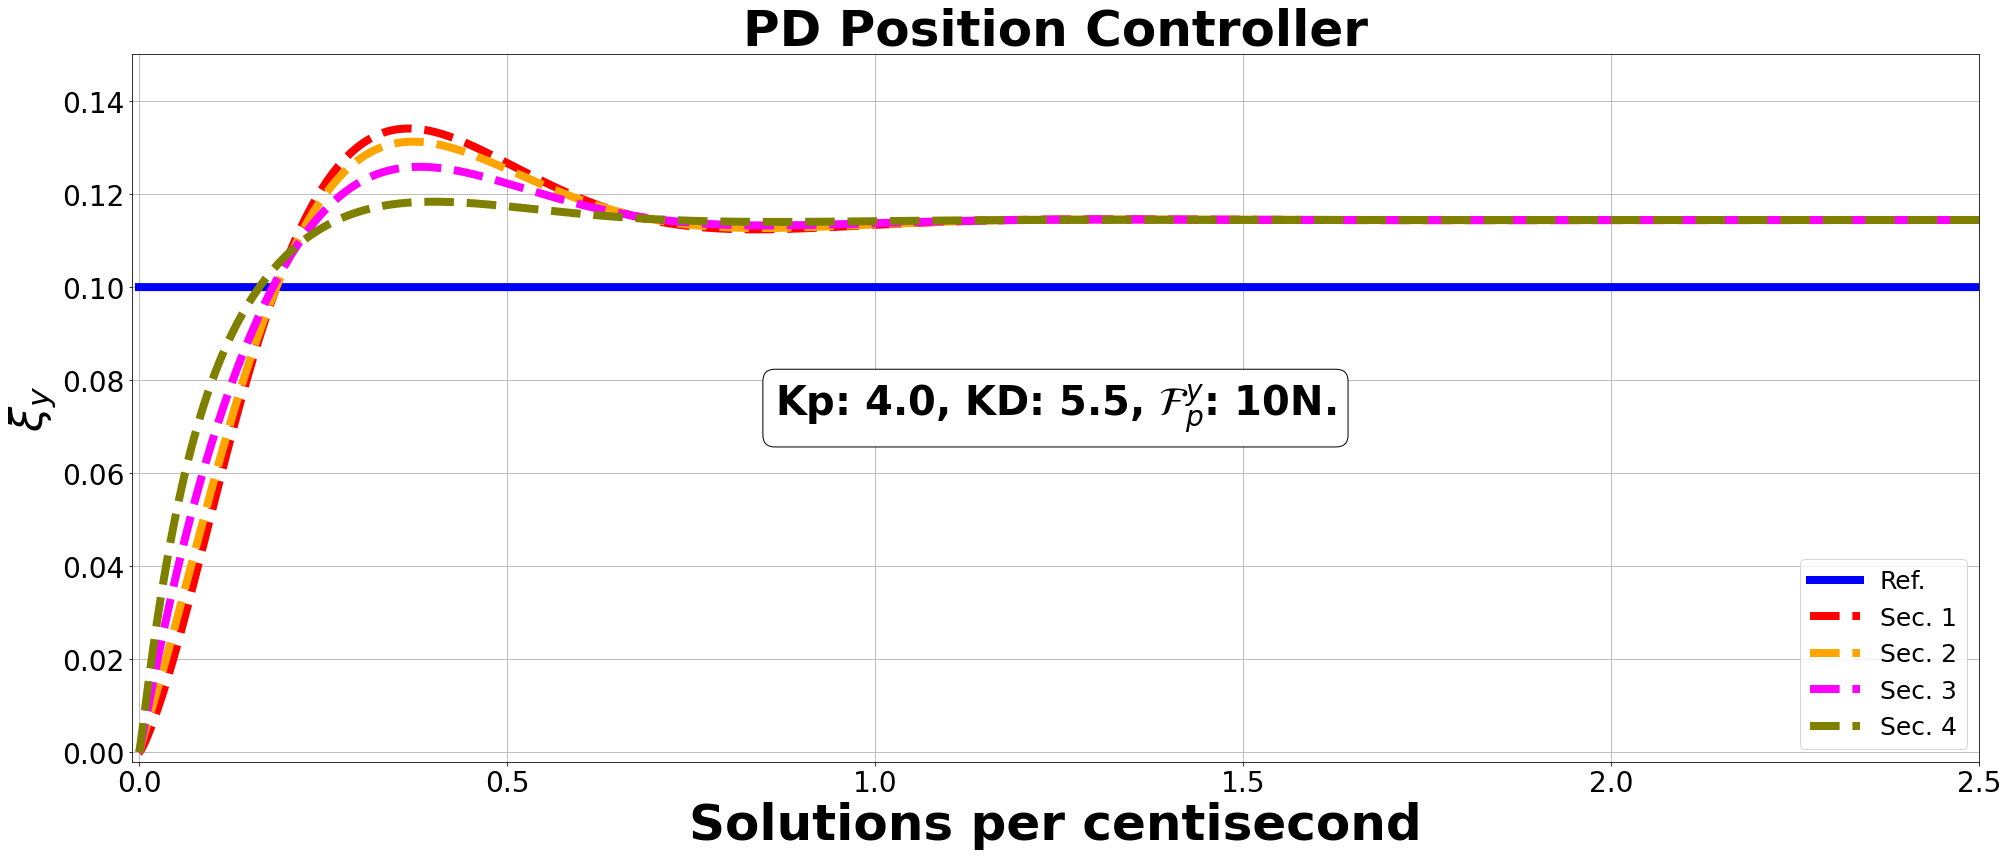

In [4]:

ax = get_fig_ax()
fname = "072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz"
bundle = load_file(fname, data_dir)
plot_axis_strains(ax, bundle, 0.1, _labelsize, plot_type="pos", \
                title=f'{bundle.controller} Position Controller', lw=8, annotate=True, xy_pos=None, \
                ylabel=r'${{ {{\xi_{y} }} }}$',  ylim=(-0.002,  0.15), xlim=(-0.01, 2.50), \
                    savename="072423_pos_control", save=True)

fname: 072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: False
runtime: 277.4110 mins or  4.6235 hours.
controller: PD | Kp: 3.5 | Kd: 0.34 | tip_load: 10
savename: fixed_fluid_pos


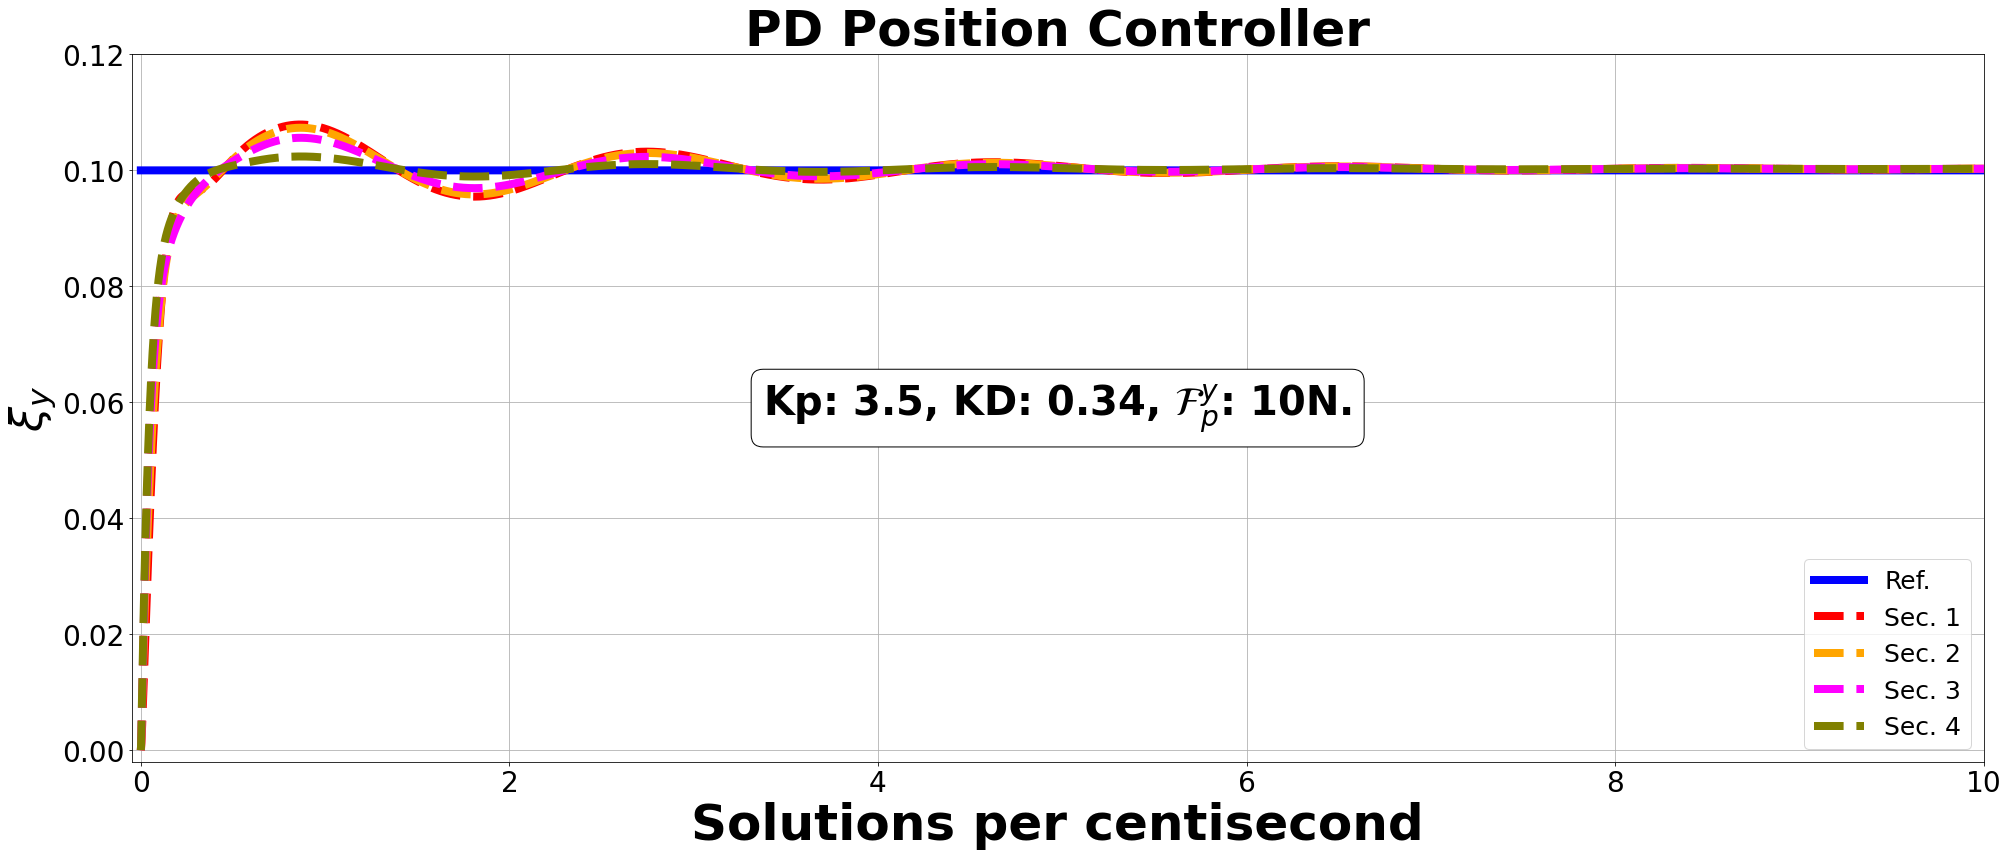

In [5]:
ax = get_fig_ax()
fname = "072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz"
bundle = load_file(fname, data_dir)


plot_axis_strains(ax, bundle, 0.1, _labelsize, plot_type="pos", \
                title=f'{bundle.controller} Position Controller', lw=8, annotate=True, xy_pos=None, \
                ylabel=r'${{ {{\xi_{y} }} }}$',  ylim=(-0.002,  0.12), xlim=(-0.05, 10.0), \
                    savename="fixed_fluid_pos", save=True)

# plot_axis_strains(ax, bundle, 0.1, _labelsize, title=f'Position  {bundle.controller} Controller', plot_type="pos", 
#                  lw=8, ylabel=r'${{\xi_{y} }}$',  xlim=(0.1, 10.000), ylim=[0.095, 0.11], plt_len=10000, annotate=False)

fname: 072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: True
runtime: 3513.3881 mins or  58.5565 hours.
controller: PD | Kp: 4.0 | Kd: 5.5 | tip_load: 10
savename: 072423_cable_4pcs_10N
fname: 072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: True, cable: False
runtime: 661.5728 mins or  11.0262 hours.
controller: PD | Kp: 4.0 | Kd: 0.5 | tip_load: 10
savename: 072723_with_drag_4_pieces_tipload.10N_PD
fname: 072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: False, cable: False
runtime: 277.4110 mins or  4.6235 hours.
controller: PD | Kp: 3.5 | Kd: 0.34 | tip_load: 10
savename: 072423_4_pieces_tipload.10N_PD
fname: 090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz, strain_goal(q^d): None
num_pieces: 4 num_sections: 41, drag: 0, cable: 1
runtime: 38

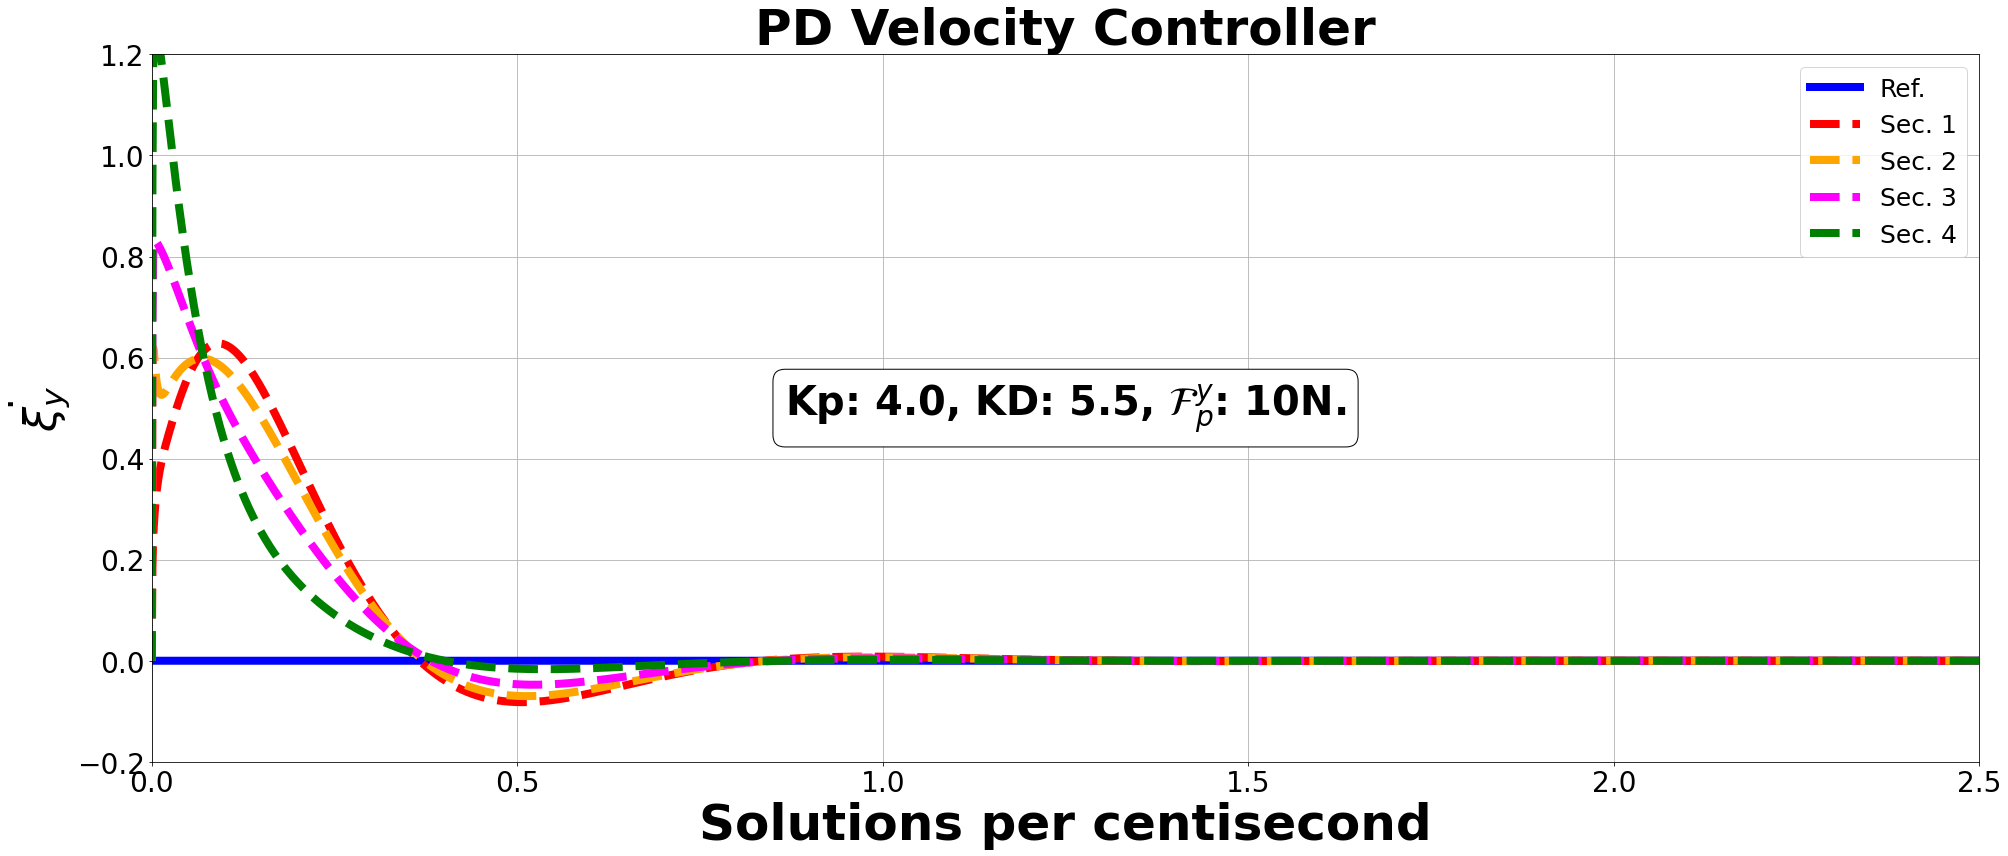

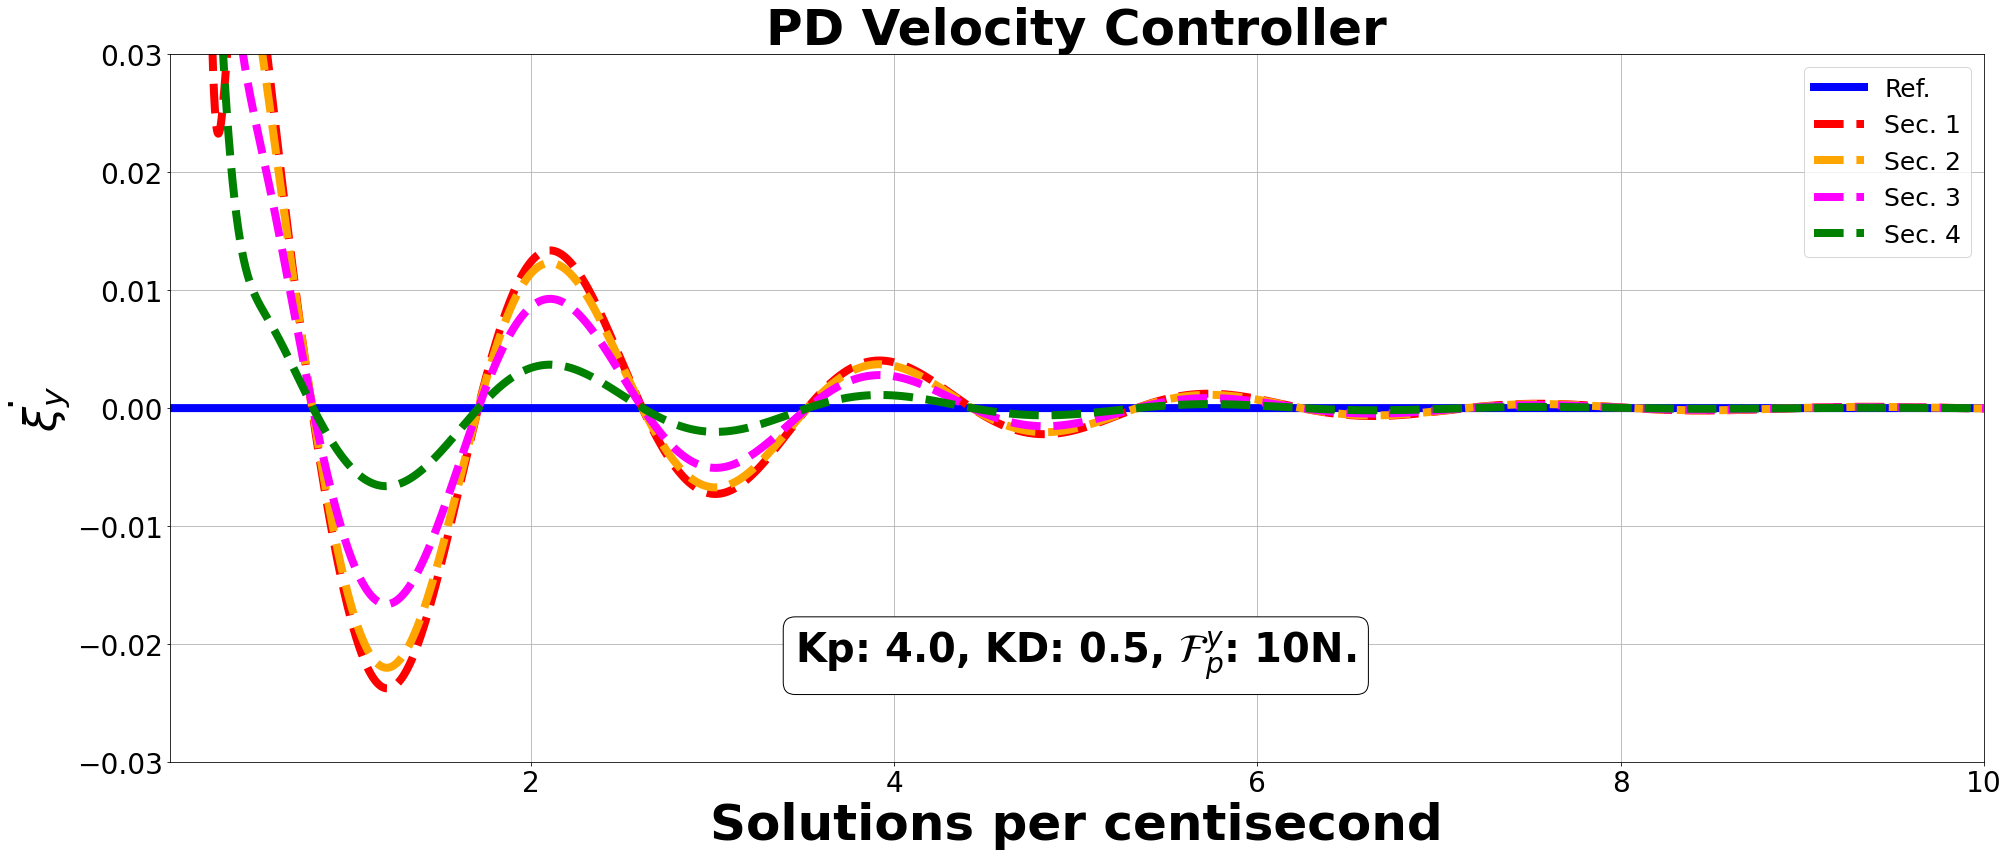

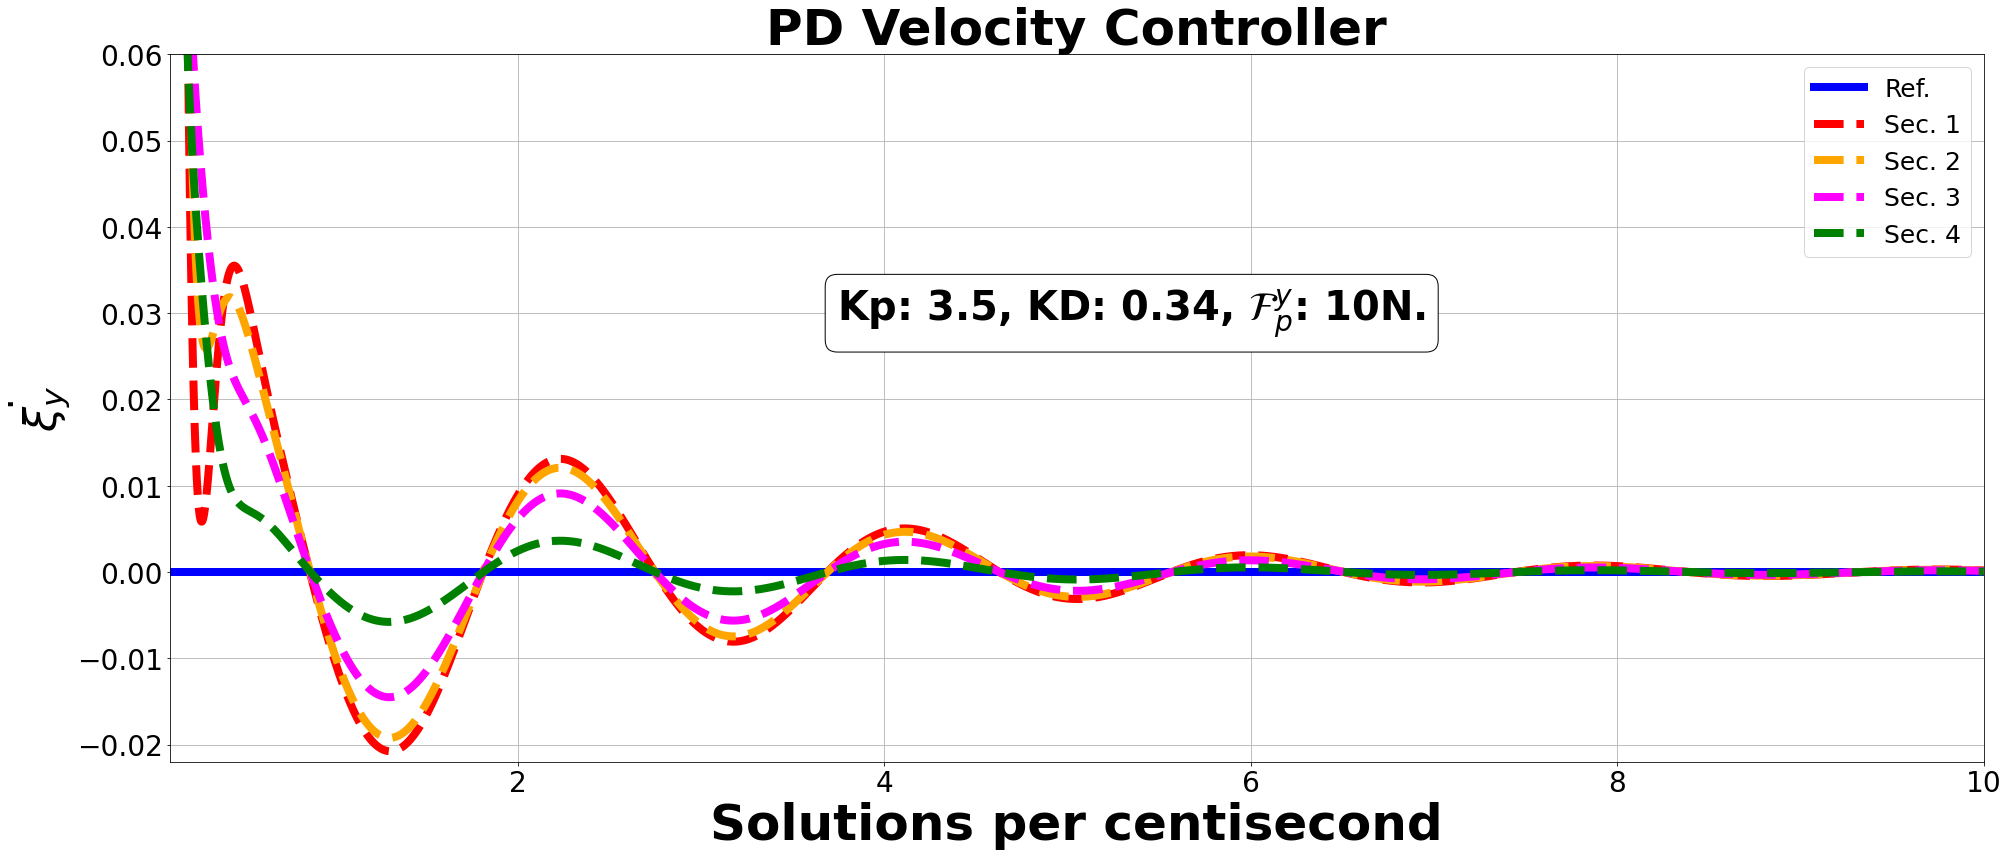

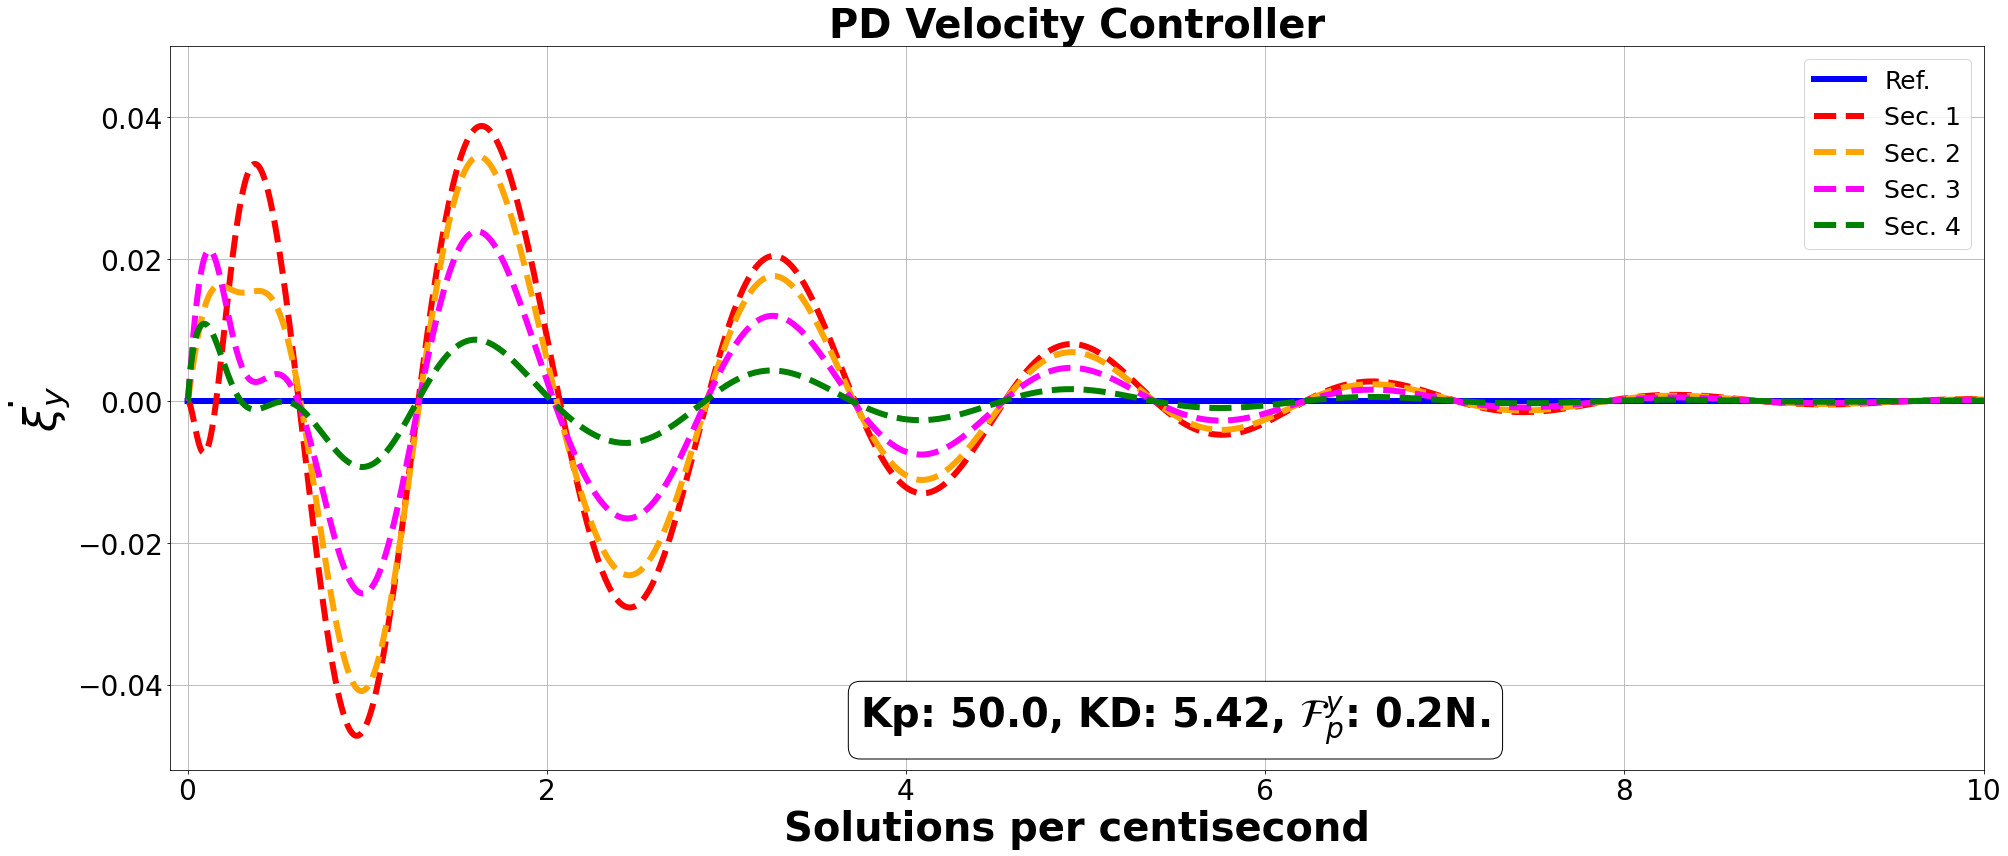

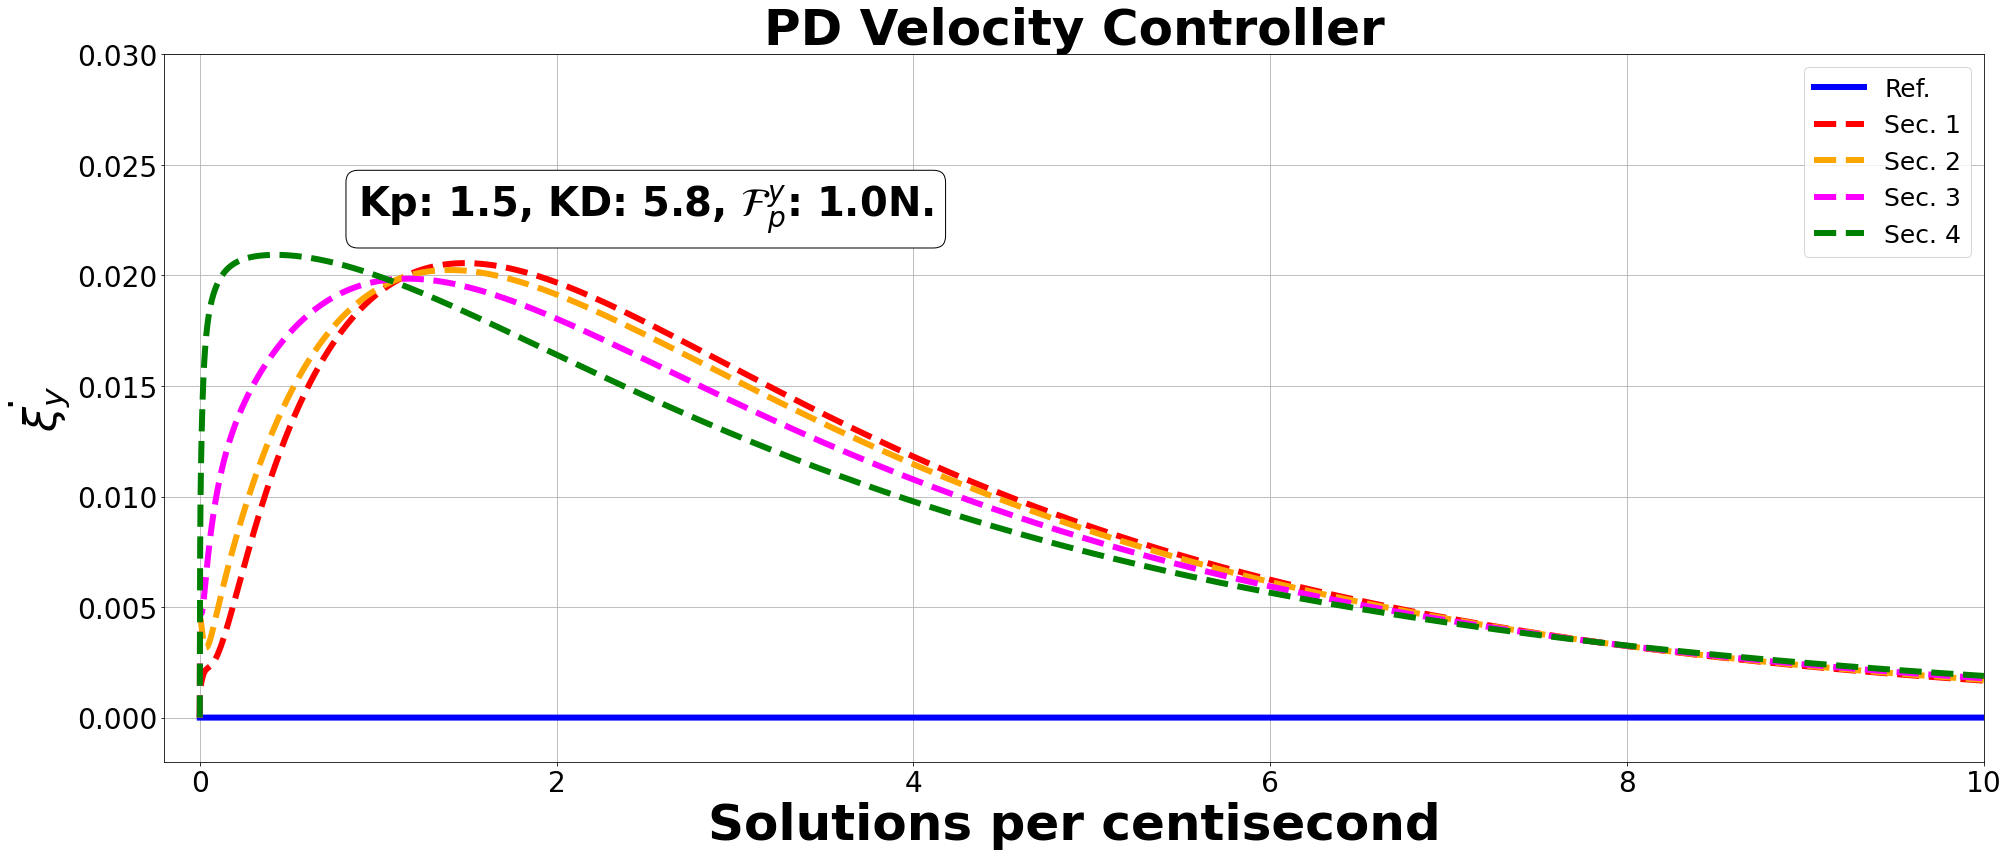

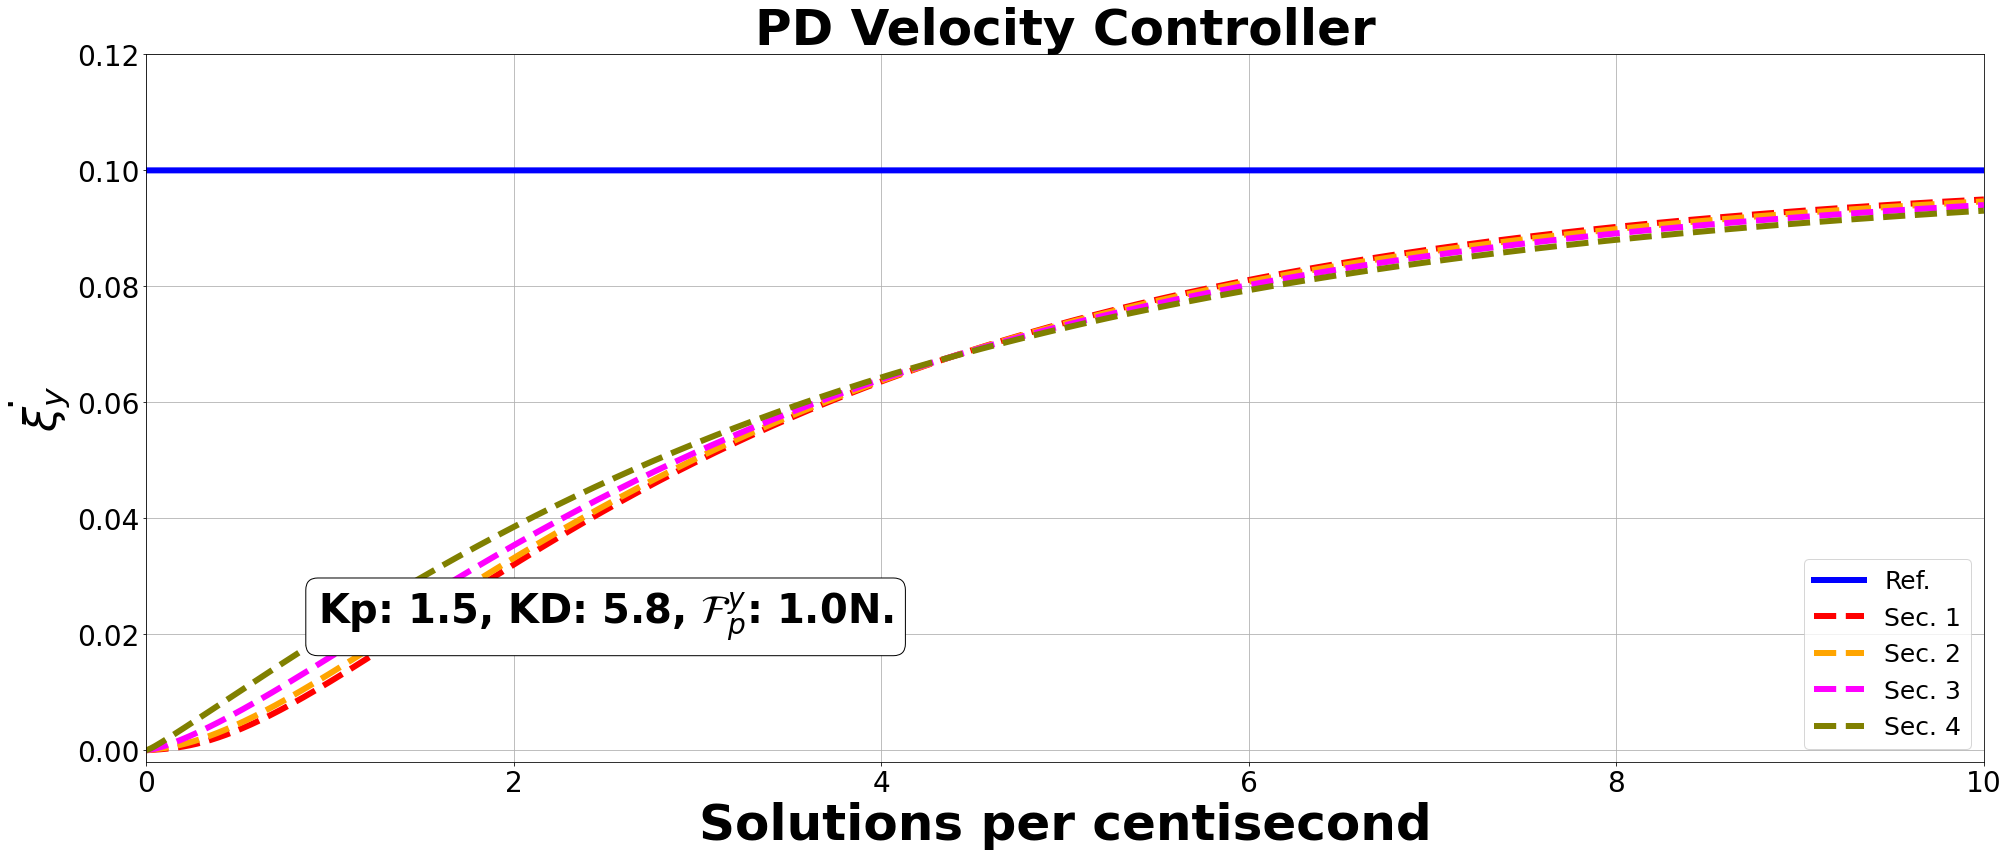

In [6]:

def do_plot(data_dir="/opt/SoRoPD.bak/", _labelsize=18):
    # plt.ion()

    ax = get_fig_ax()
    fname = "072423_10_30_23_with_cable_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, plot_type="vel", \
                    title=f'{bundle.controller} Velocity Controller', lw=8, annotate=True, xy_pos=None, \
                    ylabel=r'${{ \dot {{\xi_{y} }} }}$',  ylim=(-0.2, 1.2 ), xlim=(0.0, 2.50), \
                        savename="072423_cable_4pcs_10N", save=True)

    ax = get_fig_ax()
    fname = "072723_18_51_22_with_drag_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", lw=8, \
                annotate=True, xy_pos=(5, -0.0210), ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.01, 10.00), \
                ylim=[-0.03, 0.03], plt_len=10000, save=True)

    ax = get_fig_ax()
    fname = "072423_01_09_27_4_pieces_tipload.10N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", annotate=True,
                 lw=8, ylabel=r'${{ \dot {{\xi_{y} }} }}$', xlim=(0.100, 10), ylim=[-0.022, 0.06], plt_len=10000, 
                 save=True, xy_pos=(5.35, 0.03))
    
    ax = get_fig_ax()
    fname = "090623_11_02_36_with_cable_10_pieces_tipload.0.2N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", annotate=True,
                 xy_pos=(5.5, -0.045), 
                plt_idx=3, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.100, 10.000), ylim=[-0.052, 0.05], lw=6, 
                 _fontdict = {'fontsize':40, 'fontweight':'bold'}, save=True)

    ax = get_fig_ax()
    fname="091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    qbatch, plt_idx = bundle.qbatch, 5
    plot_axis_strains(ax, bundle, 0.0, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="vel", 
                plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.200, 10), annotate=True,
                ylim=[-.002, 0.03], lw=6, xy_pos=(2.5, 0.023), save=True)        

    
    ax = get_fig_ax()
    fname="091023_08_55_01_with_cable_10_pieces_tipload.1.0N_PD_Control.npz"
    bundle = load_file(fname, data_dir)
    qbatch, plt_idx = bundle.qbatch, 5
    plot_axis_strains(ax, bundle, 0.1, _labelsize, title=f'{bundle.controller} Velocity Controller', plot_type="pos", 
                plt_len=len(qbatch), plt_idx=plt_idx, ylabel=r'${{ \dot {{\xi_{y} }} }}$',  xlim=(-0.00, 10), annotate=True,
                ylim=[-.002, 0.12], lw=6, xy_pos=(2.5, 0.023), save=True)       

do_plot()                

### Transform the robot's configuration from the initial to the final configuration

In [50]:
gsec1_confs = joint_screws_to_confs(bundle.qsec1)
gsec2_confs = joint_screws_to_confs(bundle.qsec2)
gsec3_confs = joint_screws_to_confs(bundle.qsec3)
gsec4_confs = joint_screws_to_confs(bundle.qsec4)
gsec_confs = joint_screws_to_confs(bundle.qbatch)

(10001, 4, 4, 4)


In [51]:

print(gsec1_confs.shape)
print(gsec_confs.shape)

(10001, 4, 4)
(10001, 4, 4, 4)


In [93]:
t_idx = 100 
print(gsec1_confs.shape)
print()
print(gsec2_confs[t_idx, :,:])
print()
print(gsec2_confs[t_idx,: ,3:][:3])

(10001, 4, 4)

[[ 0.00000000e+00  2.74123254e-01 -1.07264454e-04  1.00192553e+00]
 [-2.74123254e-01  0.00000000e+00 -2.61393464e-06  1.30871350e-01]
 [ 1.07264454e-04  2.61393464e-06  0.00000000e+00  4.22013249e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]

[[1.00192553e+00]
 [1.30871350e-01]
 [4.22013249e-06]]


In [102]:

print(gsec_confs.shape)

pts_all_secs = gsec_confs[t_idx,1,:,:].squeeze()[:3,3]
print(pts_all_secs, pts_all_secs.shape )
print(pts_all_secs.T)

(10001, 4, 4, 4)
[[ 0.00000000e+00  2.74123254e-01 -1.07264454e-04  1.00192553e+00]
 [-2.74123254e-01  0.00000000e+00 -2.61393464e-06  1.30871350e-01]
 [ 1.07264454e-04  2.61393464e-06  0.00000000e+00  4.22013249e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]] (4, 4)
[1.00192553e+00 1.30871350e-01 4.22013249e-06]


In [94]:
num_indices = 29

def curved_tube(cx, cy, radius,height, angle):
    z = np.linspace(0, height, num_indices)
    theta = np.linspace(0, 2*angle, num_indices)
    
    theta_grid, z_grid=np.meshgrid(theta, z)

    x_grid = radius*np.cos(theta_grid) + cx
    y_grid = radius*np.sin(theta_grid) + cy

    yshift = np.sin(z_grid) * radius * 4
    y_grid += yshift  

    return x_grid,y_grid,z_grid

def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

def sec_to_sec(sec_prev_center, sec_next_confs, radius=0.5):
    """ 
        Retrieve the grid points as we apply the configuration transformations from 
        section to section.

        Params
        ======
        sec_prev_center: center points used in calculating the tube coordinates for the previous section 
        sec_next_confs: time-indexed transformnation matrices used in moving to the next configuration.
    """
    new_grid_points_3d = np.zeros((sec_next_confs.shape[0], ) + (num_indices, num_indices, num_indices))

    for t_idx in range(len(sec_next_confs)):
        xyz_pyts = sec_next_confs[t_idx, :3, 3] + sec_prev_center

        rot = Rotation.from_dcm( sec_next_confs[t_idx, :3,:3] )
        angle = rot.as_euler('zyx', degrees=True)[-1]
        
        x, y, z    = xyz_pyts
        new_grid_points_3d[t_idx] = curved_tube(x, y, radius, z, angle)

    return new_grid_points_3d
    
def iter_plot_tube_sec(gsec_confs, prev_pts, filled, fc, radius = 0.5, lw=0.5, \
                        save=False, savename="I", ax=None):
    """ 
        Do a voxel plot of the tranformed tube under the control law iteratively

        Params
        =======
        gsec_confs: Tranformation matrices across all time optimized indices.
        prev_pts:   3D coordinates of the center and height of the previously 
                    rendered cylindrical tube.
        *args: see function plot_tube_sec documentation.
    """
    
    new_grid_points_3d, xyz_pyts = sec_to_sec(prev_pts, gsec1_confs)
    for t_idx in range(len(new_grid_points_3d)):
       
        xg, yg, zg = new_grid_points_3d[t_idx]

        plt.cla()
        ax.set_ylabel(f"Time: {t_idx}", fontdict=_fontdict)

        faces = plot_tube_sec(xg, yg, zg, filled, fc, lw, save, savename, ax)

        f = plt.gcf()
        f.canvas.draw()
        f.canvas.flush_events()

        time.sleep(0.5)

        if t_idx > 5:
            break 

def plot_tube_sec(xc, yc, zc, fill_color, face_color, lw=0.5, save=True, savename="I", ax=None):
    """ 
        Do a voxel-filled plot of the manipulator section, savename.

        Inputs:
        ======
        xc: x-coordinates;
        yc: y-coordinates;
        zc: z-coordinates;
        fill_color = color with which to fill the interior of the tube;
        face_color: facecolor of the outer shell;
        lw: line width for the voxel sections;
        save: whether to save the section to disk;
        savename: name of file to save;
        ax: axis handle for pyplot's 3D projection plotter

        Lekan Molu, 07/31/2023
    """

    assert xc.ndim == 2, "Dimension of x coordinates cannot be more than 2"
    assert yc.ndim == 2, "Dimension of y coordinates cannot be more than 2"
    assert zc.ndim == 2, "Dimension of z coordinates cannot be more than 2"

    _fontdict = {"size": 16, 'weight': 'bold'}
    
    if ax is None:
        ax = plt.figure(figsize=(16,7)).add_subplot(projection='3d')

    faces = ax.voxels(xc, yc, zc, filled=fill_color,
                facecolors= face_color,
                edgecolors= np.clip(face_color, 0.15, .85),  
                linewidth=0.5)
          
    ax.view_init(elev=12.0, azim=5)

    ax.set_aspect('auto')
    ax.grid('off')

    ax.set_xticks([])
    ax.set_yticks([])
    # see: https://stackoverflow.com/questions/49027061/matplotlib-3d-remove-axis-ticks-draw-upper-edge-border
    ax.zaxis.set_ticklabels([])

    ax.tick_params(axis='both', which='major', labelsize=28)
    # ax.set_title(f"Deformable Manipulator", fontdict=_fontdict) #  : Section {savename}
    
    # Hide the right and top spines
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    plt.style.use('Solarize_Light2')

    
    if save:
        figure = plt.gcf()  # get current figure
        figure.set_size_inches(32, 24) 
        
        plt.savefig(join(expanduser("~"),"Documents/Papers/Pubs23/SoRoBC", f"figures/tube.jpg"), \
                format='jpg', facecolor=None, edgecolor=None, dpi=98, transparent=True, bbox_inches='tight')

    # plt.show()
    plt.tight_layout()

    return faces 

In [95]:

joints = load_file(files[0])
gsec1_confs = joint_screws_to_confs(joints.qsec1)
gsec2_confs = joint_screws_to_confs(joints.qsec2)
gsec3_confs = joint_screws_to_confs(joints.qsec3)
gsec4_confs = joint_screws_to_confs(joints.qsec4)

num_pieces: 4 num_sections: 41, , drag: False, cable: False
runtime: 926.9554 mins or  15.4493 hours
controller: PD Kp: 50.0 Kd: 0.1, tip_load: 10


In [99]:
gconfs = np.concatenate((gsec1_confs, gsec2_confs, gsec3_confs, gsec4_confs), axis=1)
np.save(join(expanduser("~"), "Documents/awesome-screw-theory/screws", 
                    f"gconfs_{files[0].split('_')[0]}.npy"), gconfs)

/tmp/ipykernel_547881/2362625972.py:138: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


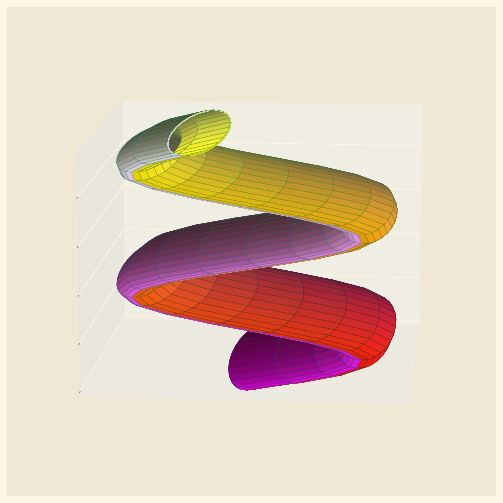

In [27]:
ax = plt.figure(figsize=(16,9)).add_subplot(projection='3d')
radius, cz = 0.25, 12.0
cx, cy = gsec1_confs[0,:2,3]
xc, yc, zc = curved_tube(cx, cy, radius, cz, angle=np.pi)
 
r, g, b = np.indices((num_indices, num_indices, num_indices)) / (num_indices-1.0)
rc = midpoints(r); gc = midpoints(g); bc = midpoints(b)
filled = (2*np.pi* (rc) *  cz ).astype(np.bool_)

# combine the color components
colors = np.zeros(filled.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# plot initial tube 
faces = plot_tube_sec(xc, yc, zc, filled, colors, 0.5, False, "I", ax)

# ax = plt.gca()
# ax.set_xlabel("Section I")

In [ ]:

prev_pts = np.array([cx, cy, cz])

# plot subsequent tubes 
iter_plot_tube_sec(gsec1_confs, prev_pts, filled, colors, radius, ax = ax)

In [33]:
qbatch      = bundle.qbatch
qdbatch     = bundle.qdbatch 

xslc        = slice(0, 24, 6)
yslc        = slice(1, 24, 6)
zslc        = slice(2, 24, 6)
roll_slc    = slice(3, 24, 6)
pitch_slc   = slice(4, 24, 6)
yaw_slc     = slice(5, 24, 6)

print(f"qb: {qbatch.shape}, qdbatch: {qdbatch.shape}")

qbatch_x, qdbatch_x  = qbatch[:,xslc], qdbatch[:,xslc]
qbatch_y, qdbatch_y  = qbatch[:,yslc], qdbatch[:,yslc]
qbatch_z, qdbatch_z  = qbatch[:,zslc], qdbatch[:,zslc]

qbatch_roll, qdbatch_roll    = qbatch[:,roll_slc], qdbatch[:,roll_slc]
qbatch_pitch, qdbatch_pitch  = qbatch[:,pitch_slc], qdbatch[:,pitch_slc]
qbatch_yaw, qdbatch_yaw      = qbatch[:,yaw_slc], qdbatch[:,yaw_slc]
print(f"qb_x: {qbatch_x.shape}, qb_y: {qbatch_y.shape} , qb_z: {qbatch_z.shape}")


qb: (10001, 24), qdbatch: (10001, 24)
qb_x: (10001, 4), qb_y: (10001, 4) , qb_z: (10001, 4)


In [48]:
xt,yt,zt = np.meshgrid(qbatch_x[0], qbatch_y[0], qbatch_z[0], indexing='ij')

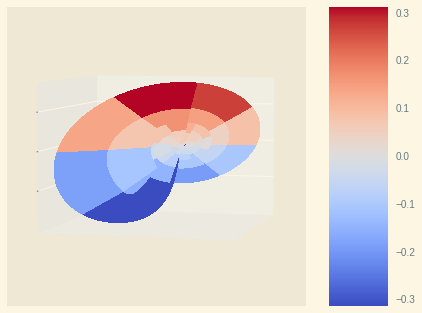

In [56]:
# surface plot of the transformed points
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(qbatch_x, qbatch_y, qbatch_z, cmap=cm.coolwarm,
                       linewidth=1, antialiased=False)

# Customize the z axis.
ax.set_zlim(qbatch_z.min(), qbatch_z.max())
# ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=1.0, aspect=5)

ax.view_init(elev=5.0, azim=15)

ax.set_aspect('auto')
ax.grid('off')

ax.set_xticks([])
ax.set_yticks([])
# see: https://stackoverflow.com/questions/49027061/matplotlib-3d-remove-axis-ticks-draw-upper-edge-border
ax.zaxis.set_ticklabels([])

ax.tick_params(axis='both', which='major', labelsize=28)
# ax.set_title(f"Deformable Manipulator", fontdict=_fontdict) #  : Section {savename}

# Hide the right and top spines
ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
plt.style.use('Solarize_Light2')


plt.show()

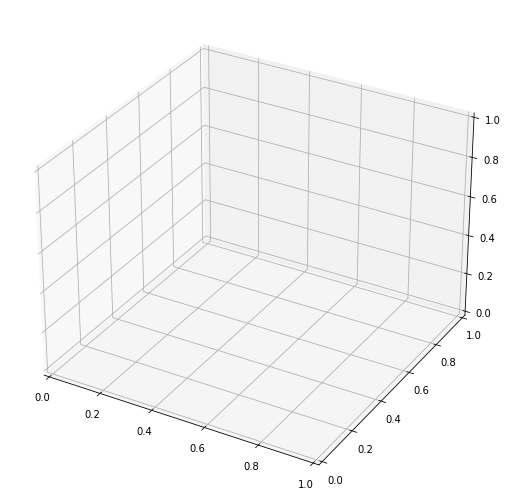

In [35]:

fig = plt.figure(figsize=(16,9))
# surface plot of the transformed points
ax = fig.subplots(subplot_kw={"projection": "3d"})


In [36]:
cm_colors = [
    "Accent", "Accent_r", "Blues",
    "Blues_r", "BrBG", "BrBG_r", "BuGn",
    "BuGn_r", "BuPu", "BuPu_r", "CMRmap",
    "CMRmap_r", "Dark2", "Dark2_r", "GnBu",
    "GnBu_r", "Greens", "Greens_r", "Greys",
    "Greys_r", "OrRd", "OrRd_r", "Oranges",
    "Oranges_r", "PRGn", "PRGn_r", "Paired",
    "Paired_r", "Pastel1", "Pastel1_r", "Pastel2",
    "Pastel2_r", "PiYG", "PiYG_r", "PuBu",
    "PuBuGn", "PuBuGn_r", "PuBu_r", "PuOr",
    "PuOr_r", "PuRd", "PuRd_r", "Purples",
    "Purples_r", "RdBu", "RdBu_r", "RdGy",
    "RdGy_r", "RdPu", "RdPu_r", "RdYlBu"]
    
from itertools import cycle
colors = cycle(cm_colors)


In [38]:
help(ax.plot3D)

Help on method plot in module mpl_toolkits.mplot3d.axes3d:

plot(xs, ys, *args, zdir='z', **kwargs) method of mpl_toolkits.mplot3d.axes3d.Axes3D instance
    Plot 2D or 3D data.
    
    Parameters
    ----------
    xs : 1D array-like
        x coordinates of vertices.
    ys : 1D array-like
        y coordinates of vertices.
    zs : float or 1D array-like
        z coordinates of vertices; either one for all points or one for
        each point.
    zdir : {'x', 'y', 'z'}, default: 'z'
        When plotting 2D data, the direction to use as z.
    **kwargs
        Other arguments are forwarded to `matplotlib.axes.Axes.plot`.



In [46]:
r, g = np.indices((10001, 4)) / (4-1.0)
rc = midpoints(r); gc = midpoints(g); #bc = midpoints(b)
filled = (2*np.pi* (rc) *  cz ).astype(np.bool_)

# combine the color components
colors = np.zeros(filled.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = rc

faces = plot_tube_sec(qbatch_x, qbatch_y, qbatch_z, filled, colors, 0.5, False, "I", ax)

ValueError: Argument filled must be 3-dimensional